# Merit Order Curve

Article: https://towardsdatascience.com/merit-order-and-marginal-abatement-cost-curve-in-python-fe9f77358777

Code slightly modified from https://github.com/hbshrestha/Data_Analytics

In [1]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Step 1

In [2]:
power_plants = ["Solar", "Wind", "Hydro", "Nuclear", "Biomass",
               "Coal", "Gas", "Oil", "Diesel"]

marginal_costs = [1, 2, 5, 10, 40, 60, 80, 120, 130]
capacity = [200, 250, 200, 500, 50, 200, 250, 100, 50]

In [3]:
df = pd.DataFrame({"Types": power_plants,
                   "Marginal Costs": marginal_costs,
                   "Available capacity (MW)": capacity
                  })

df.set_index("Types", inplace = True)

df

Marginal Costs  Available capacity (MW)
Types                                           
Solar                 1                      200
Wind                  2                      250
Hydro                 5                      200
Nuclear              10                      500
Biomass              40                       50
Coal                 60                      200
Gas                  80                      250
Oil                 120                      100
Diesel              130                       50

In [4]:
df["Cumulative capacity (MW)"] = df["Available capacity (MW)"].cumsum()
df

Marginal Costs  Available capacity (MW)  Cumulative capacity (MW)
Types                                                                     
Solar                 1                      200                       200
Wind                  2                      250                       450
Hydro                 5                      200                       650
Nuclear              10                      500                      1150
Biomass              40                       50                      1200
Coal                 60                      200                      1400
Gas                  80                      250                      1650
Oil                 120                      100                      1750
Diesel              130                       50                      1800

In [5]:
print ("Total available capacity: ", df["Available capacity (MW)"].sum(), "MW")

Total available capacity:  1800 MW


## Step 2: Enter total demand. 

In [6]:
#demand = int(input("Enter total demand (MW): "))
demand = 1500 # [MW]

## Positions of bars in x-axis

In [7]:
df

Marginal Costs  Available capacity (MW)  Cumulative capacity (MW)
Types                                                                     
Solar                 1                      200                       200
Wind                  2                      250                       450
Hydro                 5                      200                       650
Nuclear              10                      500                      1150
Biomass              40                       50                      1200
Coal                 60                      200                      1400
Gas                  80                      250                      1650
Oil                 120                      100                      1750
Diesel              130                       50                      1800

In [8]:
df["xpos"] = ""

for index in df.index:
    
    #get index number based on index name
    i = df.index.get_loc(index)
    
    if index == "Solar":    #First index
        df.loc[index, "xpos"] = df.loc[index, "Available capacity (MW)"]/2
        
    else:
        #Sum of cumulative capacity in the row above and the half of available capacity in 
        df.loc[index, "xpos"] = df.loc[index, "Available capacity (MW)"]/2 + df.iloc[i-1, 2]
        
df

Marginal Costs  Available capacity (MW)  Cumulative capacity (MW)  \
Types                                                                        
Solar                 1                      200                       200   
Wind                  2                      250                       450   
Hydro                 5                      200                       650   
Nuclear              10                      500                      1150   
Biomass              40                       50                      1200   
Coal                 60                      200                      1400   
Gas                  80                      250                      1650   
Oil                 120                      100                      1750   
Diesel              130                       50                      1800   

           xpos  
Types            
Solar     100.0  
Wind      325.0  
Hydro     550.0  
Nuclear   900.0  
Biomass  1175.0  
Coal     1300.0  
Gas      1525.0  
Oil      1700.0  
Diesel   1775.0

## Find the power plant type that determines cut-off

In [9]:
def cut_off(demand):
    #To get the cutoff power plant 
    for index in df.index:

        if df.loc[index, "Cumulative capacity (MW)"] < demand:
            pass

        else:
            cut_off_power_plant = index
            print ("Power plant that sets the electricity price is: ", cut_off_power_plant)
            break
            
    return cut_off_power_plant 

cut_off(demand)

Power plant that sets the electricity price is:  Gas


'Gas'

Power plant that sets the electricity price is:  Gas


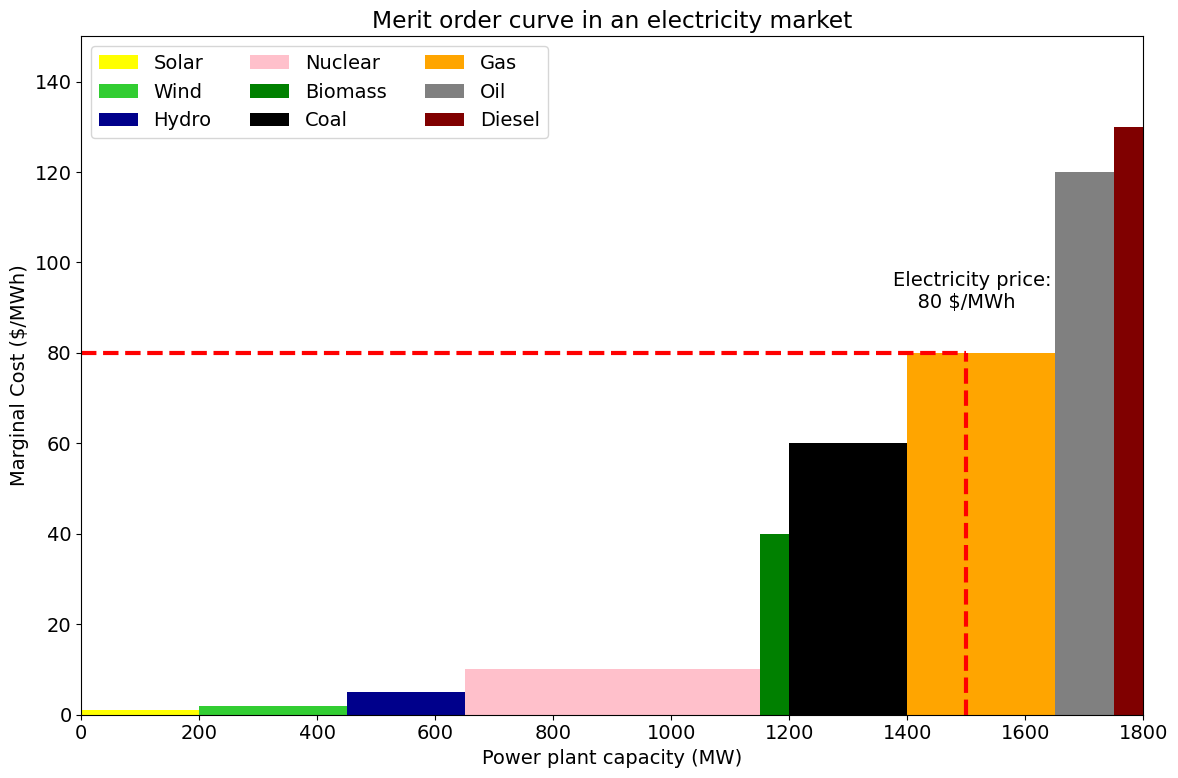

In [10]:
def merit_order_curve(demand = 1500):
    plt.figure(figsize = (12, 8))
    plt.rcParams["font.size"] = 14

    color_dict = {"Solar":"yellow","Wind":"limegreen","Nuclear":"pink","Hydro":"darkblue", "Biomass":"green",
             "Gas":"orange","Coal":"black","Oil":"gray","Diesel":"maroon"}
    df["Colors"] = df.index.map(color_dict)
    colors = df["Colors"].tolist()
    
    
    xpos = df["xpos"].values.tolist()
    y = df["Marginal Costs"].values.tolist()
    #width of each bar
    w = df["Available capacity (MW)"].values.tolist()
    cut_off_power_plant = cut_off(demand)

    fig = plt.bar(xpos, 
            height = y,
            width = w,
            fill = True,
            color = colors)

    plt.xlim(0, df["Available capacity (MW)"].sum())
    plt.ylim(0, df["Marginal Costs"].max() + 20)

    plt.hlines(y = df.loc[cut_off_power_plant, "Marginal Costs"],
              xmin = 0,
              xmax = demand,
              color = "red",
               linestyle = "dashed",
              linewidth = 3)

    plt.vlines(x = demand,
               ymin = 0,
               ymax = df.loc[cut_off_power_plant, "Marginal Costs"],
               color = "red",
               linestyle = "dashed",
               label = "Demand",
              linewidth = 3)

    plt.legend(fig.patches, power_plants,
              loc = "best",
              ncol = 3)

    plt.text(x = demand - df.loc[cut_off_power_plant, "Available capacity (MW)"]/2,
            y = df.loc[cut_off_power_plant, "Marginal Costs"] + 10,
            s = f"Electricity price: \n    {df.loc[cut_off_power_plant, 'Marginal Costs']} $/MWh")

    plt.xlabel("Power plant capacity (MW)")
    plt.ylabel("Marginal Cost ($/MWh)")
    plt.title("Merit order curve in an electricity market")
    plt.tight_layout()
    plt.savefig("output/merit_order.jpeg",
               dpi = 300)
    plt.show()
    
merit_order_curve(demand = 1500)

In [11]:
from ipywidgets import *

demand = widgets.IntSlider(value = 1500,   #default value
                          min = 0,        #minimum possible value, here 0
                          max = df["Available capacity (MW)"].sum(),    #maximum possible value is sum of all available capacity
                          step = 10,      
                          description = "Demand",
                          continuous_update = False    #Set False to avoid flickering
                          )

interactive_plot = interact(merit_order_curve,
                           demand = demand)


interactive(children=(IntSlider(value=1500, continuous_update=False, description='Demand', max=1800, step=10),…

## Merit Order Implementation with Plotly

In [12]:
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()

In [13]:
df

Marginal Costs  Available capacity (MW)  Cumulative capacity (MW)  \
Types                                                                        
Solar                 1                      200                       200   
Wind                  2                      250                       450   
Hydro                 5                      200                       650   
Nuclear              10                      500                      1150   
Biomass              40                       50                      1200   
Coal                 60                      200                      1400   
Gas                  80                      250                      1650   
Oil                 120                      100                      1750   
Diesel              130                       50                      1800   

           xpos     Colors  
Types                       
Solar     100.0     yellow  
Wind      325.0  limegreen  
Hydro     550.0   darkblue  
Nuclear   900.0       pink  
Biomass  1175.0      green  
Coal     1300.0      black  
Gas      1525.0     orange  
Oil      1700.0       gray  
Diesel   1775.0     maroon

In [14]:
def plotly_merit_order(demand = 1500):    #default demand for convenience
    cut_off_power_plant = cut_off(demand)

    xpos = df.xpos.tolist()
    marginal_costs = df["Marginal Costs"].tolist()
    available_capacities = df["Available capacity (MW)"].tolist()
    #colors = df["Colors"].tolist()
    
    fig = go.Figure()

    #Plot all bars at once. This does not give the labels though.
    #fig = go.Figure(data = go.Bar(x = xpos,
    #                             y = marginal_costs,
    #                             width = available_capacities,
    #                             marker_color = colors,
                                  #name = df.index.tolist(),                             
    #                             )
    #               )
 
    #To plot each bar one by one
    for index in df.index:
        fig.add_traces(go.Bar(x = [df.loc[index, "xpos"]],
                             y = [df.loc[index, "Marginal Costs"]],
                             width = [df.loc[index, "Available capacity (MW)"]],
                             name = index,
                             marker_color = [df.loc[index, "Colors"]]
                             )
                      )
        


    fig.add_vline(x = demand,
                  y0 = 0,

                  #Normalize value for y1 between min and max of the range of y-axis. The min is 0 and the max is 130.
                  y1 = df.loc[cut_off_power_plant, "Marginal Costs"]/max(marginal_costs),
                  line_dash = "dash",
                  line_color = "red",

                    )

    fig.add_hline(y = df.loc[cut_off_power_plant, "Marginal Costs"],
                  x0 = 0,

                  #Normalize value for demand between min and max of xpos
                  x1 = (demand - min(xpos))/ (max(xpos) - min(xpos)),
                 line_dash = "dash",
                 line_color = "red",

                 )

    #Add text for demand
    fig.add_trace(go.Scatter(
        x=[demand* 1.15],
        y=[0.1],
        mode="text",
        name="Demand",
        text=["Demand: \n" + str(demand)+ " MW"],
        textposition="top center",
        textfont=dict(
            #family="sans serif",
            size=16,
            color="red"
        )
    ))

    #Add text for electricity price
    fig.add_trace(go.Scatter(
        x=[demand * 1.15],
        y=[df.loc[cut_off_power_plant, "Marginal Costs"]],
        mode="text",
        name="Electricity price",
        text=["Electricity price: \n" + str(df.loc[cut_off_power_plant, "Marginal Costs"])+ " $/MWh"],
        textposition="top center",
        textfont=dict(
            #family="sans serif",
            size=16,
            color="red"
        )
    ))

    #Update ranges for x and y axis
    fig.update_xaxes(range=[0, sum(available_capacities)])
    fig.update_yaxes(range=[0, max(marginal_costs)])
    
    fig.update_layout(title = "Merit Order Curve",
                     xaxis_title = "Available Capacities (MW)",
                     yaxis_title = "Marginal Costs",
                     )
    
    fig.update_layout(showlegend = True)
    


    fig.show()
    
plotly_merit_order(demand = 1000)

Power plant that sets the electricity price is:  Nuclear


In [15]:
demand = widgets.IntSlider(value = 1500,   #default value
                          min = 0,        #minimum possible value, here 0
                          max = df["Available capacity (MW)"].sum(),    #maximum possible value is sum of all available capacity
                          step = 10,      
                          description = "Demand",
                          continuous_update = True    #Set False to avoid flickering
                          )


interact(plotly_merit_order, demand = demand);

interactive(children=(IntSlider(value=1500, description='Demand', max=1800, step=10), Output()), _dom_classes=…

## Marginal Abatement Cost Curve

In [16]:
opportunities = ["Replacing old lights with LEDs", "Car fuel economy improvements", "Building retrofits",
               "Industrial process improvements", "Power plants maintenance", "Buildings insulation",
               "Reforestation", "Waste recovery","Wind",
               "Solar", "Biomass cofiring", "Hybrid cars"]

mitigation_potential = [120, 100, 40, 50, 60, 80, 200, 80, 50, 50, 30, 20]

costs = [-100, -75, -50, -20, -10, 10, 15, 25, 30, 40, 60, 90]

df1 = pd.DataFrame({"Opportunities": opportunities,
                  "Mitigation Potential (CO2e)": mitigation_potential,
                  "Marginal Abatement Costs ($/CO2e)": costs})

df1.set_index("Opportunities", inplace = True)

df1["Sectors"] = ["Buildings", "Transport", "Buildings", "Industry", "Power",
                "Buildings","Forestry","Waste", "Power", "Power", "Power", "Transport"]

df1["Colors"] = df1["Sectors"].map({"Buildings":"darkorange", "Transport":"olivedrab", "Industry":"grey",
                                 "Forestry": "green", "Waste":"darkgoldenrod", "Power": "lightsteelblue"})

df1

Mitigation Potential (CO2e)  \
Opportunities                                                  
Replacing old lights with LEDs                           120   
Car fuel economy improvements                            100   
Building retrofits                                        40   
Industrial process improvements                           50   
Power plants maintenance                                  60   
Buildings insulation                                      80   
Reforestation                                            200   
Waste recovery                                            80   
Wind                                                      50   
Solar                                                     50   
Biomass cofiring                                          30   
Hybrid cars                                               20   

                                 Marginal Abatement Costs ($/CO2e)    Sectors  \
Opportunities                                                                   
Replacing old lights with LEDs                                -100  Buildings   
Car fuel economy improvements                                  -75  Transport   
Building retrofits                                             -50  Buildings   
Industrial process improvements                                -20   Industry   
Power plants maintenance                                       -10      Power   
Buildings insulation                                            10  Buildings   
Reforestation                                                   15   Forestry   
Waste recovery                                                  25      Waste   
Wind                                                            30      Power   
Solar                                                           40      Power   
Biomass cofiring                                                60      Power   
Hybrid cars                                                     90  Transport   

                                         Colors  
Opportunities                                    
Replacing old lights with LEDs       darkorange  
Car fuel economy improvements         olivedrab  
Building retrofits                   darkorange  
Industrial process improvements            grey  
Power plants maintenance         lightsteelblue  
Buildings insulation                 darkorange  
Reforestation                             green  
Waste recovery                    darkgoldenrod  
Wind                             lightsteelblue  
Solar                            lightsteelblue  
Biomass cofiring                 lightsteelblue  
Hybrid cars                           olivedrab

In [17]:
df1["Cumulative Mitigation Potential"] = df1["Mitigation Potential (CO2e)"].cumsum()
df1

Mitigation Potential (CO2e)  \
Opportunities                                                  
Replacing old lights with LEDs                           120   
Car fuel economy improvements                            100   
Building retrofits                                        40   
Industrial process improvements                           50   
Power plants maintenance                                  60   
Buildings insulation                                      80   
Reforestation                                            200   
Waste recovery                                            80   
Wind                                                      50   
Solar                                                     50   
Biomass cofiring                                          30   
Hybrid cars                                               20   

                                 Marginal Abatement Costs ($/CO2e)    Sectors  \
Opportunities                                                                   
Replacing old lights with LEDs                                -100  Buildings   
Car fuel economy improvements                                  -75  Transport   
Building retrofits                                             -50  Buildings   
Industrial process improvements                                -20   Industry   
Power plants maintenance                                       -10      Power   
Buildings insulation                                            10  Buildings   
Reforestation                                                   15   Forestry   
Waste recovery                                                  25      Waste   
Wind                                                            30      Power   
Solar                                                           40      Power   
Biomass cofiring                                                60      Power   
Hybrid cars                                                     90  Transport   

                                         Colors  \
Opportunities                                     
Replacing old lights with LEDs       darkorange   
Car fuel economy improvements         olivedrab   
Building retrofits                   darkorange   
Industrial process improvements            grey   
Power plants maintenance         lightsteelblue   
Buildings insulation                 darkorange   
Reforestation                             green   
Waste recovery                    darkgoldenrod   
Wind                             lightsteelblue   
Solar                            lightsteelblue   
Biomass cofiring                 lightsteelblue   
Hybrid cars                           olivedrab   

                                 Cumulative Mitigation Potential  
Opportunities                                                     
Replacing old lights with LEDs                               120  
Car fuel economy improvements                                220  
Building retrofits                                           260  
Industrial process improvements                              310  
Power plants maintenance                                     370  
Buildings insulation                                         450  
Reforestation                                                650  
Waste recovery                                               730  
Wind                                                         780  
Solar                                                        830  
Biomass cofiring                                             860  
Hybrid cars                                                  880

In [18]:
df1["xpos"] = ""

for index in df1.index:
    
    #get index number based on index name
    i = df1.index.get_loc(index)
    
    if index == "Replacing old lights with LEDs":    #First index
        df1.loc[index, "xpos"] = df1.loc[index, "Mitigation Potential (CO2e)"]/2
        
    else:
        #Sum of cumulative mitigation potential in the row above and the half of mitigation in 
        df1.loc[index, "xpos"] = df1.loc[index, "Mitigation Potential (CO2e)"]/2 + df1.iloc[i-1, 4]
        
df1

Mitigation Potential (CO2e)  \
Opportunities                                                  
Replacing old lights with LEDs                           120   
Car fuel economy improvements                            100   
Building retrofits                                        40   
Industrial process improvements                           50   
Power plants maintenance                                  60   
Buildings insulation                                      80   
Reforestation                                            200   
Waste recovery                                            80   
Wind                                                      50   
Solar                                                     50   
Biomass cofiring                                          30   
Hybrid cars                                               20   

                                 Marginal Abatement Costs ($/CO2e)    Sectors  \
Opportunities                                                                   
Replacing old lights with LEDs                                -100  Buildings   
Car fuel economy improvements                                  -75  Transport   
Building retrofits                                             -50  Buildings   
Industrial process improvements                                -20   Industry   
Power plants maintenance                                       -10      Power   
Buildings insulation                                            10  Buildings   
Reforestation                                                   15   Forestry   
Waste recovery                                                  25      Waste   
Wind                                                            30      Power   
Solar                                                           40      Power   
Biomass cofiring                                                60      Power   
Hybrid cars                                                     90  Transport   

                                         Colors  \
Opportunities                                     
Replacing old lights with LEDs       darkorange   
Car fuel economy improvements         olivedrab   
Building retrofits                   darkorange   
Industrial process improvements            grey   
Power plants maintenance         lightsteelblue   
Buildings insulation                 darkorange   
Reforestation                             green   
Waste recovery                    darkgoldenrod   
Wind                             lightsteelblue   
Solar                            lightsteelblue   
Biomass cofiring                 lightsteelblue   
Hybrid cars                           olivedrab   

                                 Cumulative Mitigation Potential   xpos  
Opportunities                                                            
Replacing old lights with LEDs                               120   60.0  
Car fuel economy improvements                                220  170.0  
Building retrofits                                           260  240.0  
Industrial process improvements                              310  285.0  
Power plants maintenance                                     370  340.0  
Buildings insulation                                         450  410.0  
Reforestation                                                650  550.0  
Waste recovery                                               730  690.0  
Wind                                                         780  755.0  
Solar                                                        830  805.0  
Biomass cofiring                                             860  845.0  
Hybrid cars                                                  880  870.0

In [19]:
df1["xpos_labels"] = df1["xpos"] - df1["Mitigation Potential (CO2e)"]/2

df1

Mitigation Potential (CO2e)  \
Opportunities                                                  
Replacing old lights with LEDs                           120   
Car fuel economy improvements                            100   
Building retrofits                                        40   
Industrial process improvements                           50   
Power plants maintenance                                  60   
Buildings insulation                                      80   
Reforestation                                            200   
Waste recovery                                            80   
Wind                                                      50   
Solar                                                     50   
Biomass cofiring                                          30   
Hybrid cars                                               20   

                                 Marginal Abatement Costs ($/CO2e)    Sectors  \
Opportunities                                                                   
Replacing old lights with LEDs                                -100  Buildings   
Car fuel economy improvements                                  -75  Transport   
Building retrofits                                             -50  Buildings   
Industrial process improvements                                -20   Industry   
Power plants maintenance                                       -10      Power   
Buildings insulation                                            10  Buildings   
Reforestation                                                   15   Forestry   
Waste recovery                                                  25      Waste   
Wind                                                            30      Power   
Solar                                                           40      Power   
Biomass cofiring                                                60      Power   
Hybrid cars                                                     90  Transport   

                                         Colors  \
Opportunities                                     
Replacing old lights with LEDs       darkorange   
Car fuel economy improvements         olivedrab   
Building retrofits                   darkorange   
Industrial process improvements            grey   
Power plants maintenance         lightsteelblue   
Buildings insulation                 darkorange   
Reforestation                             green   
Waste recovery                    darkgoldenrod   
Wind                             lightsteelblue   
Solar                            lightsteelblue   
Biomass cofiring                 lightsteelblue   
Hybrid cars                           olivedrab   

                                 Cumulative Mitigation Potential   xpos  \
Opportunities                                                             
Replacing old lights with LEDs                               120   60.0   
Car fuel economy improvements                                220  170.0   
Building retrofits                                           260  240.0   
Industrial process improvements                              310  285.0   
Power plants maintenance                                     370  340.0   
Buildings insulation                                         450  410.0   
Reforestation                                                650  550.0   
Waste recovery                                               730  690.0   
Wind                                                         780  755.0   
Solar                                                        830  805.0   
Biomass cofiring                                             860  845.0   
Hybrid cars                                                  880  870.0   

                                xpos_labels  
Opportunities                                
Replacing old lights with LEDs          0.0  
Car fuel economy improvements         120.0  
Building retrofits                    220.0  
Indus

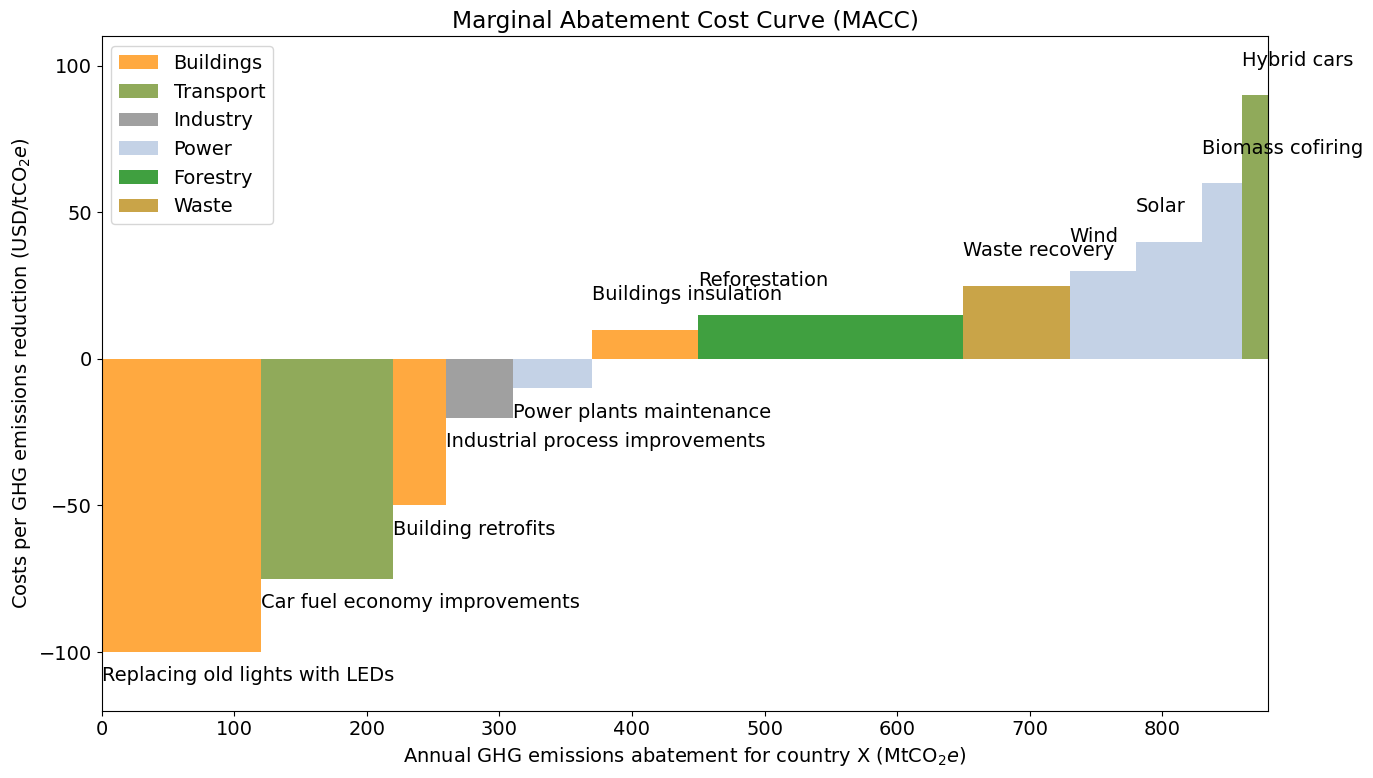

In [20]:
plt.figure(figsize = (14, 8))
plt.rcParams["font.size"] = 14

colors = df1["Colors"].values.tolist()
xpos = df1["xpos"].values.tolist()
y = df1["Marginal Abatement Costs ($/CO2e)"].values.tolist()\

#width of each bar
w = df1["Mitigation Potential (CO2e)"].values.tolist()
sectors = df1["Sectors"].values.tolist()

fig = plt.bar(xpos, 
              height = y,
              width = w,
              fill = True,
              color = colors,
              alpha = 0.75)

#Add labels for each mitigation technology/option
for index in df1.index:
    
    x_ref = df1.loc[index, "xpos_labels"]
    y_ref = df1.loc[index, "Marginal Abatement Costs ($/CO2e)"]
    
    if y_ref <=0:    
        plt.annotate(text = index,
                     xy = (x_ref, y_ref),
                     xytext = (x_ref, y_ref - 10),
                    )
    else:
        plt.annotate(text = index,
                     xy = (x_ref, y_ref),
                     xytext = (x_ref, y_ref + 10))
        
#Select only relevant patches for legend
selected_patches = fig.patches[0], fig.patches[1], fig.patches[3], fig.patches[4], fig.patches[6], fig.patches[7]
selected_sectors = sectors[0], sectors[1], sectors[3], sectors[4], sectors[6], sectors[7]

plt.xlim(0, df1["Mitigation Potential (CO2e)"].sum())
plt.ylim(df1["Marginal Abatement Costs ($/CO2e)"].min() - 20,
        df1["Marginal Abatement Costs ($/CO2e)"].max() + 20)

plt.legend(selected_patches,
          selected_sectors,
          loc = "best")

plt.xlabel("Annual GHG emissions abatement for country X (MtCO$_2e$)")
plt.ylabel("Costs per GHG emissions reduction (USD/tCO$_2e$)")
plt.title("Marginal Abatement Cost Curve (MACC)")

plt.tight_layout()
plt.savefig("output/mac_curve.jpeg",
            dpi = 300)
plt.show()